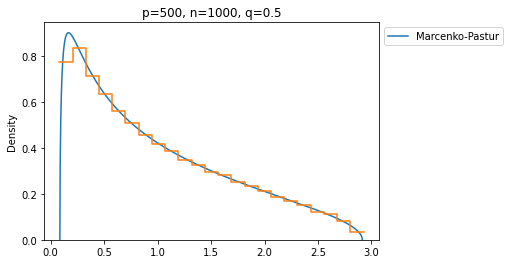

In [4]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns



### Marcenko-Pastur
def MP(x,p,n):
    q = 1.*p/n
    dmin = (1.0 - np.sqrt(q))**2
    dmax = (1.0 + np.sqrt(q))**2
    if (x < dmin or x > dmax):
        rho = 0
    else:   
        rho = np.sqrt((dmax-x)*(x-dmin))/(2*np.pi*q*x)
    return(rho)    

### Parametros
p = 500
n = 1000
q = p/n
dmin = (1.0 - np.sqrt(q))**2
dmax = (1.0 + np.sqrt(q))**2
points = 1000

x = np.linspace(dmin,dmax,points)
marcenko = np.zeros([points])
for i in range(points):
    marcenko[i] = MP(x[i],p,n)
    
plt.plot(x,marcenko,label='Marcenko-Pastur') 
title='p='+str(p)+', n='+str(n)+', q='+str(p/n)
plt.title(title)
plt.legend(loc='upper left',bbox_to_anchor = (1, 1)) 



### SIMULACION MONTE CARLO
m = 10
eig = []
for i in range(m):
    Z = np.random.normal(0,1, (p, n))
    S = 1./n*np.dot(Z,np.transpose(Z))
    lambdas, V = LA.eigh(S)
    eig.append(lambdas)
eigenvalues =  np.array(eig)
eigenvec = eigenvalues.flatten()
sns.histplot(data=eigenvec,stat="density", element="step", fill=False, label='Simulación')


